### 1. 主成分分析

  主成分分析（Principal Component Analysis, PCA），是一种非监督机器学习算法，主要应用于数据的降维。另外，还可以应用于可视化、去噪等方面。

  如下图所示，对于横纵轴的两个特征，关键是怎样找到到一个轴，使得样本空间的所有点映射到这个轴后，方差最大（各个点差别最大）。

![](https://liorpachter.files.wordpress.com/2014/05/pca_figure1.jpg?w=490&h=490)

主成分分析的步骤为：

1) 对所有的样本点进行demean处理（使得样本的均值为0）  
2) 我们项要求一个轴的方向 w = (w1, w2)  
3) 使得所有的样本映射到w以后，有：  

\begin{equation}
Var\left(X_{project}\right) = \frac{1}{m}\sum_{i=1}^{m}||X_{project}^\left(i\right)-  \bar{X}_{project} ||^2
\end{equation}

最大。

由于之前进行了demean处理，那么$ \bar{X}_{project} $ 为0，上式相当于：

\begin{equation}
Var\left(X_project\right) = \frac{1}{m}\sum_{i=1}^{m}\|X_{project}^\left(i\right) \|^2
\end{equation}

假设我们的方向向量为w(w1, w2), 样本点$X^\left(i\right)$为$\left(X_1^\left(i\right), X_2^\left(i\right)\right)$，则映射到该方向上的（即求解的）为$\left(X_{pr1}^\left(i\right), X_{pr2}^\left(i\right)\right)$。

\begin{equation}
\begin{aligned}
X^\left(i\right) \cdot w &= ||X^\left(i\right)|| \cdot ||w|| \cdot cos\theta \\
&=||X^\left(i\right)|| \cdot cos\theta \\
&=\|X_{project^\left(i\right)}\|
\end{aligned}
\end{equation}

所以最上是要求：

\begin{equation}
Var\left(X_project\right) = \frac{1}{m}\sum_{i=1}^{m}\left(X^\left(i\right) \cdot w\right)^2
\end{equation}

最大。

在N维向量中也就是：
\begin{equation}
\begin{aligned}
Var\left(X_project\right) = \frac{1}{m}\sum_{i=1}^{m}\left(X_1^\left(i\right) \cdot w_1 + \cdots + X_2^\left(i\right) \cdot w_2 + \cdots + X_n^\left(i\right) \cdot w_n\right)^2
\end{aligned}
\end{equation}

这其实就是一个目标函数的最优化问题，可以用梯度上升法求解。
不过梯度上升法并非最优方法，因为PCA是可以被数学求解的。

### 2. 梯度上升求解

通过上面的推导，我们最终要求w，使得以下目标函数最大。

\begin{equation}
f\left(X\right) = \frac{1}{m}\sum_{i=1}^{m}\left(X_1^\left(i\right) \cdot w_1 + \cdots + X_2^\left(i\right) \cdot w_2 + \cdots + X_n^\left(i\right) \cdot w_n\right)^2
\end{equation}

$f(X)$的梯度为：

\begin{equation}
\begin{aligned}
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial w_1}  \\
\frac{\partial f}{\partial w_2}   \\  
\cdots  \\
\frac{\partial f}{\partial w_n} \\
\end{bmatrix}
\end{aligned}
\end{equation}

即：

\begin{equation}
\nabla f =\frac{2}{m} \begin{bmatrix}
\sum_{i=1}^{m}\left(X_1^\left(i\right) \cdot w_1 + \cdots + X_2^\left(i\right) \cdot w_2 + \cdots + X_n^\left(i\right) \cdot w_n\right)X_1^\left(i\right)  \\
\sum_{i=1}^{m}\left(X_1^\left(i\right) \cdot w_1 + \cdots + X_2^\left(i\right) \cdot w_2 + \cdots + X_n^\left(i\right) \cdot w_n\right)X_2^\left(i\right)   \\  
\cdots  \\
\sum_{i=1}^{m}\left(X_1^\left(i\right) \cdot w_1 + \cdots + X_2^\left(i\right) \cdot w_2 + \cdots + X_n^\left(i\right) \cdot w_n\right)X_n^\left(i\right) \\
\end{bmatrix}
\end{equation}

最终可化为：
\begin{equation}
\nabla f =\frac{2}{m}\begin{bmatrix}
\sum_{i=1}^{m}\left(X^\left(i\right) \cdot w\right)X_1^\left(i\right)  \\
\sum_{i=1}^{m}\left(X^\left(i\right) \cdot w\right)X_2^\left(i\right)   \\  
\cdots  \\
\sum_{i=1}^{m}\left(X^\left(i\right) \cdot w\right)X_n^\left(i\right) \\
\end{bmatrix}
\end{equation}

最后可化为最简形式(n * 1维)：
\begin{equation}
\nabla f =\frac{2}{m}X^T\left(Xw\right)
\end{equation}

---

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

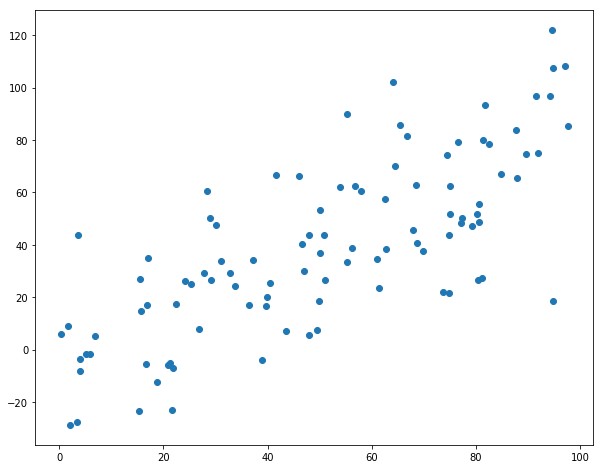

In [61]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 2. * np.random.normal(0., 10., size = 100)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [62]:
def demean(X):
    return X - np.mean(X, axis = 0)

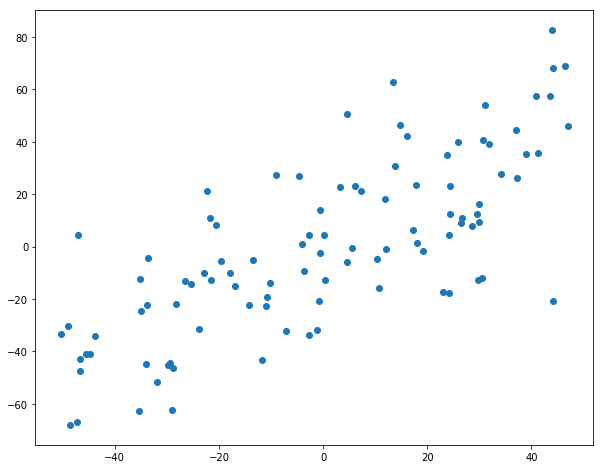

In [63]:
X_demean = demean(X)

# 整体分布与原来一致，不过均值变为了0
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [64]:
# 梯度上升实现

def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

# 梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 验证梯度(最直接但是麻烦的方法)
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res
        

In [65]:
def direction(w):
    return w/np.linalg.norm(w)

# 梯度上升

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w += eta * gradient
        w = direction(w)  # 单位方向向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
               break
    
        cur_iter += 1
               
    return w

In [66]:
initial_w = np.random.random(X.shape[1]) # 不能初始为0向量
eta = 0.001

In [67]:
print(gradient_ascent(df_debug, X_demean, initial_w, eta))

print(gradient_ascent(df_math, X_demean, initial_w, eta))

[0.62680463 0.77917646]
[0.62680463 0.77917646]


### 3. 数据前N个主成分
  
在求出第一主成分后，如何求第二主成分？  
1). 将数据在第一主成分上的分量去掉；  
2). 在新数据上求第一主成分。

In [68]:
# 对之前相应的函数进行调整

def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

# 梯度
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)
def direction(w):
    return w/np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w += eta * gradient
        w = direction(w)  # 单位方向向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
               break
    
        cur_iter += 1
               
    return w

In [69]:
# 第一主成分为：
initial_w = np.random.random(X.shape[1]) # 不能初始为0向量
eta = 0.001

w = first_component(X_demean, initial_w, eta)
print(w)

[0.62680463 0.77917646]


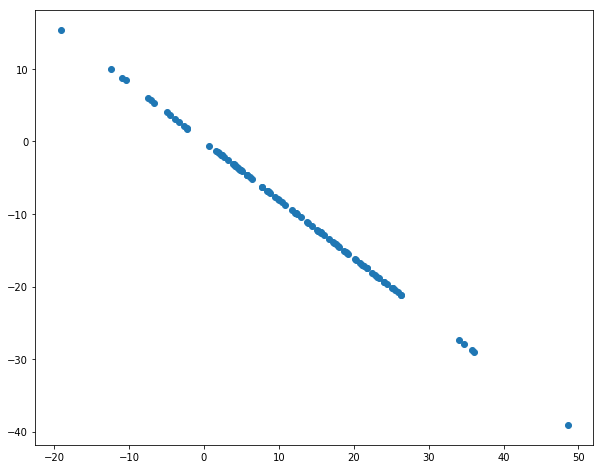

In [70]:
# 第二主成分为：
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - (X[i].dot(w)) * w

# 或者
X2 = X - X.dot(w).reshape(-1, 1) * w


# 在第二维度上的分布
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [71]:
w2 = first_component(X2, initial_w, eta)
print(w2)

[-0.77917646  0.62680463]


In [72]:
# 这两个维度垂直
print(w.dot(w2))

3.3306690738754696e-16


In [73]:
# 由此可写出得到前N个主成分的方法

def first_n_component(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    
    res = []
    for i in range(n):
        initial_w = np.random.random(X.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [74]:
# 调用
first_n_component(2, X)

[array([0.62680463, 0.77917646]), array([ 0.77917646, -0.62680463])]

### 4. 封装自己的class

In [75]:
import numpy as np

class PCA:
    
    def __init__(self, n_components):
        '''初始化数据'''
        assert n_components >= 1, "n_components must be valid!"
        self.n_components = n_components
        self.components_ = None
    
    def fit(self, X, eta = 0.01, n_iters = 1e4):
        '''获得数据前N个主成分'''
        assert self.n_components <= X.shape[1], \
        "n_components shouldn't be greater than the feature number of X!"
        
        def demean(X):
            return X - np.mean(X, axis = 0)
        
        def f(w, X):
            return np.sum(X.dot(w) ** 2.) / len(X)
        
        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)
        
        def direction(w):
            return w/np.linalg.norm(w)
        
        def first_component(X, initial_w, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
            
            w = direction(initial_w)
            cur_iter = 0
            
            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w += gradient * eta
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break
                cur_iter += 1
            
            return w
        
        X_pca = demean(X)
        self.components_ = np.empty(shape = (self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X.shape[1])
            w = first_component(X_pca, initial_w)
            self.components_[i,:] = w
            X_pca -= X_pca.dot(w).reshape(-1, 1) * w
        
        return self
    
    def transform(self, X):
        '''对于给定X，映射到各个主成分中'''
        assert X.shape[1] == self.components_.shape[1]            
        return X.dot(self.components_.T)
        
    def inverse_transform(self, X):
        '''低维数据返回高维数据'''
        assert X.shape[1] == self.components_.shape[0]
        return X.dot(self.components_)
            
            
    def __repr__(self):
        return "PCA (n_components = {})".format(self.n_components)
    

In [76]:
# 调用class

X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 2. * np.random.normal(0., 10., size = 100)

pca = PCA(n_components=1)
pca.fit(X)

PCA (n_components = 1)

In [77]:
pca.components_

array([[0.70395612, 0.71024346]])

In [78]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [79]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

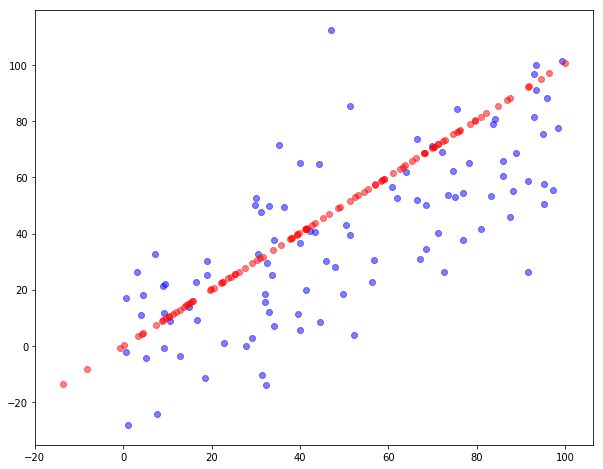

In [80]:
# 原始数据与inverse之后的数据可视化
plt.scatter(X[:,0], X[:,1], color = 'b', alpha = 0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color = 'r', alpha = 0.5)
plt.show()

### 5. sklearn中的PCA

In [81]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [82]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 2. * np.random.normal(0., 10., size = 100)

pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [83]:
pca.components_

array([[0.6385894 , 0.76954765]])

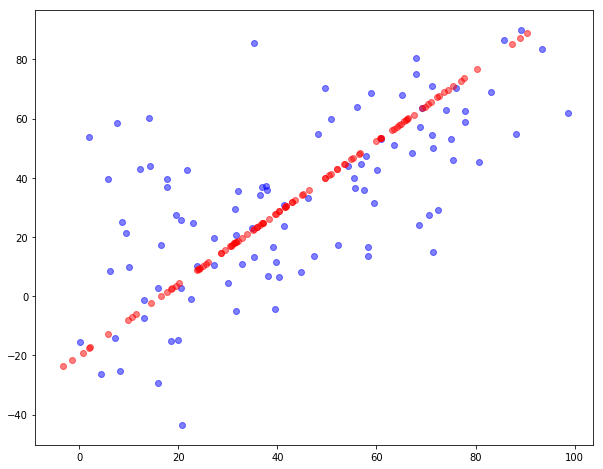

In [84]:
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

plt.scatter(X[:,0], X[:,1], color = 'b', alpha = 0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color = 'r', alpha = 0.5)
plt.show()

In [85]:
# 对手写识别数据进行降维
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [87]:
%%time

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9933333333333333
CPU times: user 83 ms, sys: 2.51 ms, total: 85.5 ms
Wall time: 86.6 ms


In [88]:
# 先进性降维再分类
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [89]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_reduction, y_train)
print(knn.score(X_test_reduction, y_test))

0.6266666666666667
CPU times: user 62.1 ms, sys: 13.4 ms, total: 75.5 ms
Wall time: 37.3 ms


可以看到PCA可以大大减少算法的运行速度，但是大大降低了精度。降到二维会丢失太多的信息，所以我们可以用sklearn中的explained_variance_ratio_参数来看前多少个轴的可解释方差。

In [90]:
pca.explained_variance_ratio_

array([0.14566794, 0.13448185])

In [91]:
# 所有的主成分
pca = PCA(n_components=X.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45667940e-01, 1.34481846e-01, 1.19590806e-01, 8.63833775e-02,
       5.90548655e-02, 4.89518409e-02, 4.31561171e-02, 3.63466115e-02,
       3.41098378e-02, 3.03787911e-02, 2.38923779e-02, 2.24613809e-02,
       1.81136494e-02, 1.81125785e-02, 1.51771863e-02, 1.39510696e-02,
       1.32079987e-02, 1.21938163e-02, 9.95264723e-03, 9.39755156e-03,
       9.02644073e-03, 7.96537048e-03, 7.64762648e-03, 7.10249621e-03,
       7.04448539e-03, 5.89513570e-03, 5.65827618e-03, 5.08671500e-03,
       4.97354466e-03, 4.32832415e-03, 3.72181436e-03, 3.42451450e-03,
       3.34729452e-03, 3.20924019e-03, 3.03301292e-03, 2.98738373e-03,
       2.61397965e-03, 2.28591480e-03, 2.21699566e-03, 2.14081498e-03,
       1.86018920e-03, 1.57568319e-03, 1.49171335e-03, 1.46157540e-03,
       1.17829304e-03, 1.06805854e-03, 9.41934676e-04, 7.76116004e-04,
       5.59378443e-04, 3.65463486e-04, 1.71625943e-04, 8.78242589e-05,
       5.20662123e-05, 5.19689192e-05, 4.16826522e-05, 1.50475650e-05,
      

In [92]:
all_var = []
for i in range(X.shape[1]):
    all_var.append(np.sum(pca.explained_variance_ratio_[:i]))


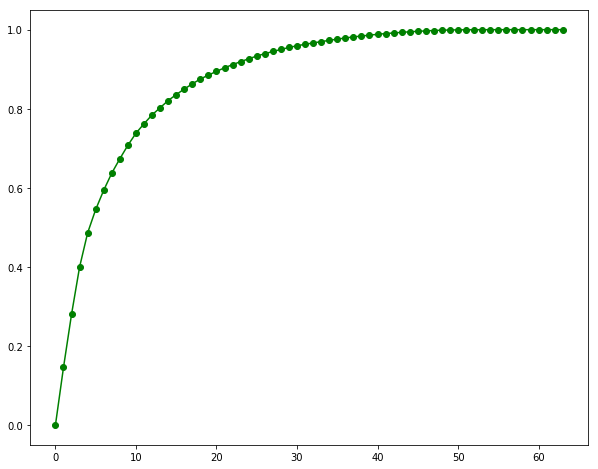

In [93]:
plt.plot(all_var, 'o-',color = 'g')
plt.show()

In [94]:
# 在PCA中我们可以传入多少的可解释方差, eg. 0.95
# 并且可以看到，28维的时候就有0.95了

pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [95]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [96]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_reduction, y_train)
print(knn.score(X_test_reduction, y_test))

0.9888888888888889
CPU times: user 116 ms, sys: 27.1 ms, total: 143 ms
Wall time: 64 ms


这样，时间要比一开始要少，而且得到的score也比较高。如果有海量样本，牺牲一点精度换取更少的时间是值得的。
另外PCA一点重要的应用是对于高维数据的可视化。

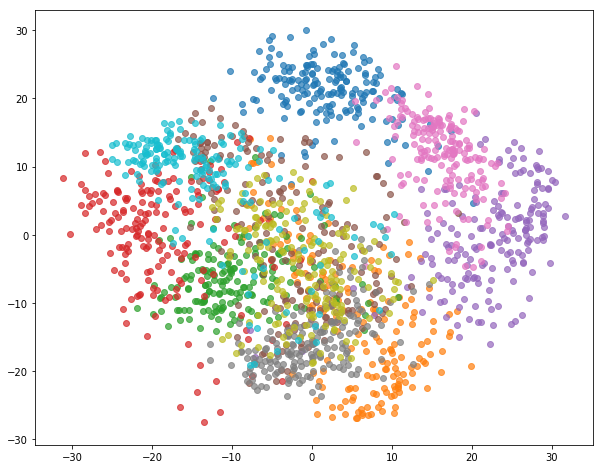

In [98]:
# plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y == i, 1], alpha=0.7)
plt.show()

### 6. 使用MNIST手写数据集

In [100]:
from sklearn.datasets import fetch_openml

In [104]:
mnist_data = fetch_openml("mnist_784")

/Users/yingli/anaconda3/lib/python3.6/site-packages/sklearn/datasets/_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [108]:
X, y = mnist_data.data, mnist_data.target

In [110]:
X_train = np.array(X[:60000], dtype='float')
X_test = np.array(X[60000:], dtype='float')
y_train = np.array(y[:60000], dtype='float')
y_test = np.array(y[60000:], dtype='float')

In [112]:
knn = KNeighborsClassifier()
%time knn.fit(X_train, y_train)

CPU times: user 36.8 s, sys: 701 ms, total: 37.5 s
Wall time: 39.1 s


KNeighborsClassifier()

In [113]:
%time knn.score(X_test, y_test)

CPU times: user 11min 28s, sys: 5.27 s, total: 11min 33s
Wall time: 11min 49s


0.9688

In [114]:
# 对于大样本而言，这是非常耗时的，因此我们有必要使用PCA降维
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [115]:
print(X_train.shape)
print(X_train_reduction.shape)

(60000, 784)
(60000, 87)


In [116]:
knn = KNeighborsClassifier()
%time knn.fit(X_train_reduction, y_train)

CPU times: user 747 ms, sys: 45.5 ms, total: 792 ms
Wall time: 891 ms


KNeighborsClassifier()

In [117]:
X_test_reduction = pca.transform(X_test)
%time knn.score(X_test_reduction, y_test)

CPU times: user 1min 20s, sys: 627 ms, total: 1min 20s
Wall time: 1min 23s


0.9728

fit时间由 39s -> 891ms；score时间由11min 49s -> 1min 23s；时间有了显著的提升。并且，可以看到甚至score也有了提升。PCA在***降噪***方面也有作用，所以准确度也有提升。

### 7. PCA降噪

In [119]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [120]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [123]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

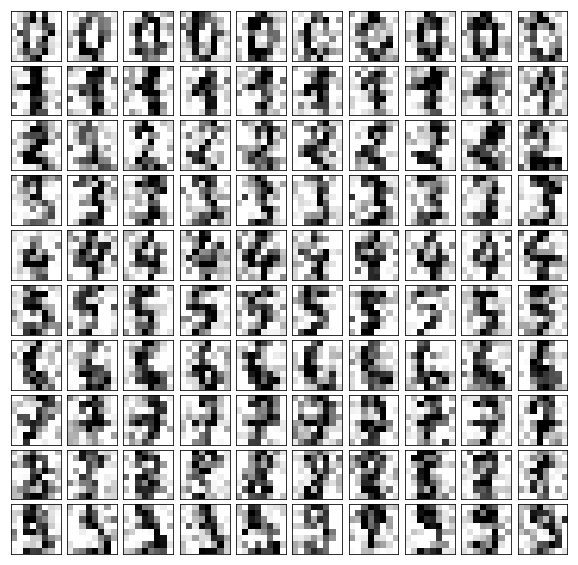

In [126]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10,figsize = (10, 10), subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap = 'binary', interpolation = 'nearest', clim = (0, 16))
    plt.show
    
plot_digits(example_digits)

# 可以看到室友很多杂音的，这些数字看的并不清晰

In [127]:
# 使用PCA降噪

pca = PCA(0.5) # 具体情况具体分析
pca.fit(noisy_digits)

PCA(n_components=0.5)

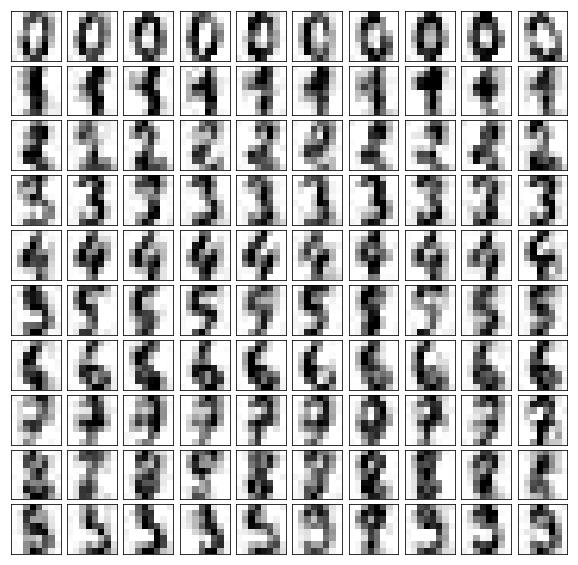

In [128]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

# 可以看到比上面要稍清晰些